# =======================================
# TITANIC PREDICTION
# =======================================

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score


In [2]:
df_original = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df_original.copy()
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
print("Shape of dataset:")
display(df.shape)

display(df.info())

Shape of dataset:


(891, 11)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,total_missing,percentage
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Cabin,687,77.10


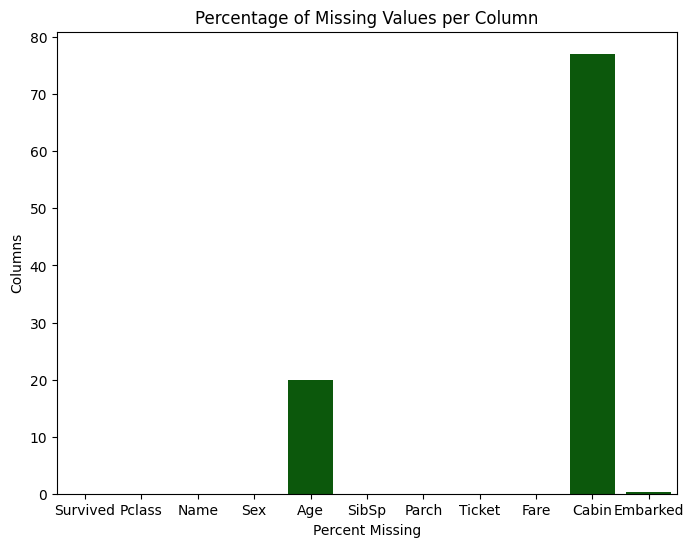

In [5]:
missing_vals = df.isna().sum()
missing_vals = pd.DataFrame(missing_vals, columns=['total_missing'])
missing_vals['percentage'] = (missing_vals['total_missing']/df.shape[0])*100
missing_vals['percentage'] = missing_vals['percentage'].round(2)
display(missing_vals)

plt.figure(figsize=(8,6))
sns.barplot(data=missing_vals, y='percentage', x=missing_vals.index, color='darkgreen')
plt.xlabel("Percent Missing")
plt.ylabel("Columns")
plt.title("Percentage of Missing Values per Column")
plt.show()

In [6]:
df = df.drop(columns=['Cabin', 'Ticket'])

,count,percentage
Survived,,
Did not survive,549,61.62
Survived,342,38.38


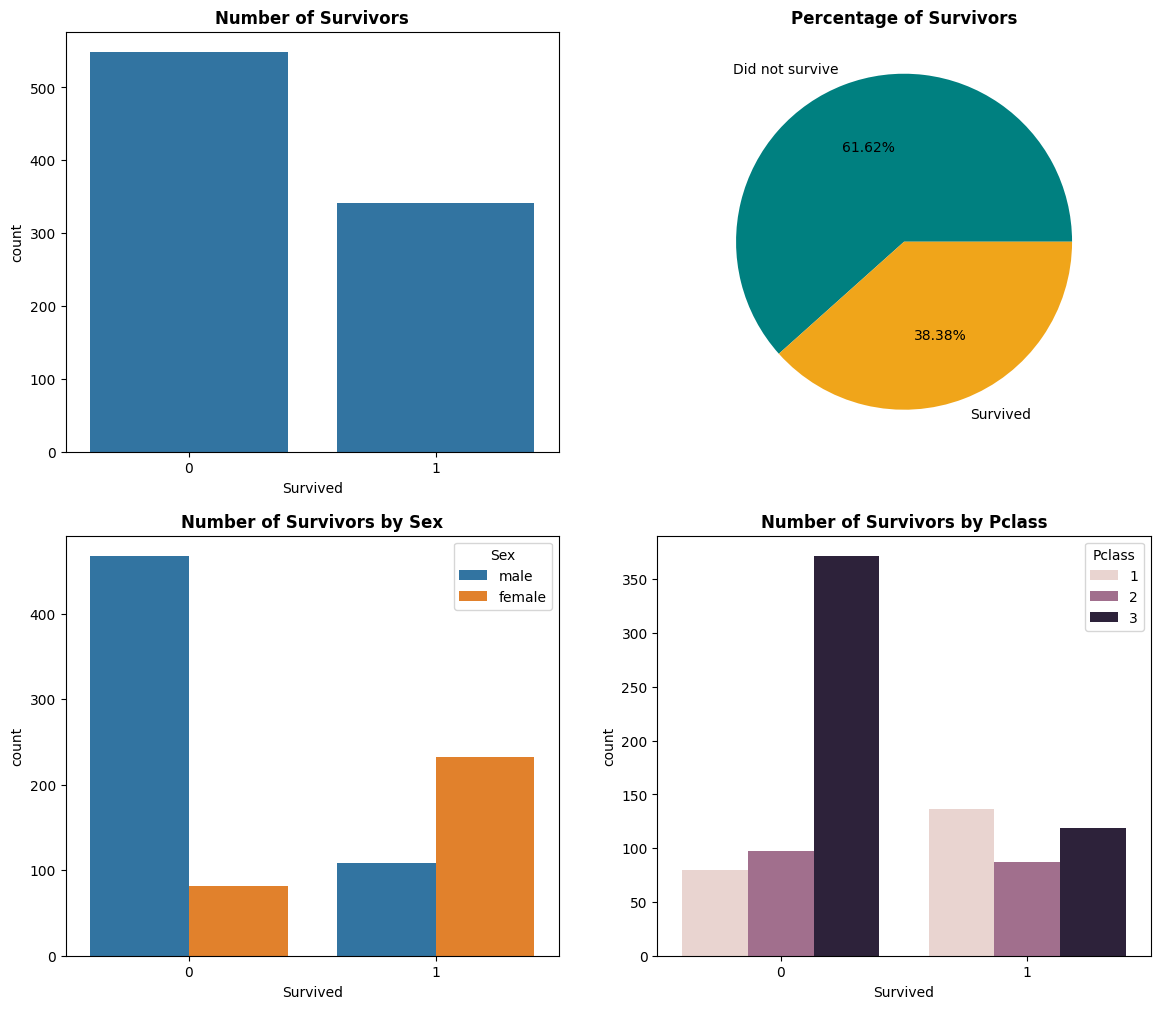

In [7]:
survivor_percentage = pd.DataFrame(df['Survived'].value_counts())
survivor_percentage['percentage'] = (survivor_percentage / df.shape[0])*100
survivor_percentage['percentage'] = survivor_percentage['percentage'].round(2)
survivor_percentage = survivor_percentage.rename(index={0:'Did not survive', 1:'Survived'})
display(survivor_percentage)

fig, ax = plt.subplots(2,2, figsize=(14,12))

sns.countplot(data=df, x='Survived', ax=ax[0][0])
ax[0][0].set_title("Number of Survivors", fontweight='bold')

ax[0][1].pie(survivor_percentage['count'], labels=['Did not survive', 'Survived'], autopct='%1.2f%%', colors=['#008080', "#F0A51A"])
ax[0][1].set_title('Percentage of Survivors', fontweight='bold')

sns.countplot(data=df, x='Survived', hue='Sex', ax=ax[1][0])
ax[1][0].set_title("Number of Survivors by Sex", fontweight='bold')

sns.countplot(data=df, x='Survived', hue='Pclass', ax=ax[1][1])
ax[1][1].set_title("Number of Survivors by Pclass", fontweight='bold')

plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_27052\706995789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='viridis')


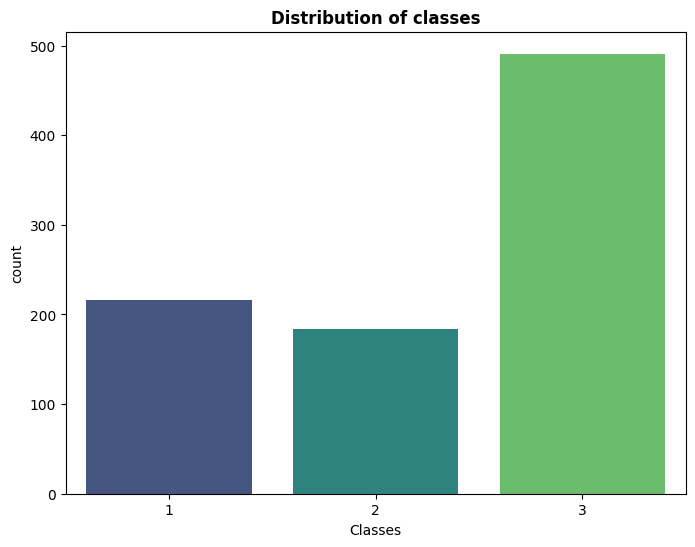

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Pclass', palette='viridis')
plt.title('Distribution of classes', fontweight='bold')
plt.xlabel('Classes')
plt.savefig('plots/01_classes_distr', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\MSI\AppData\Local\Temp\ipykernel_27052\3400681671.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')


,Total_count,Survived,Percentage_survived
Title,,,
Capt,1,0,0.00
Col,2,1,50.00
Countess,1,1,100.00
Don,1,0,0.00
Dr,7,3,42.86
Jonkheer,1,0,0.00
Lady,1,1,100.00
Major,2,1,50.00
Master,40,23,57.50


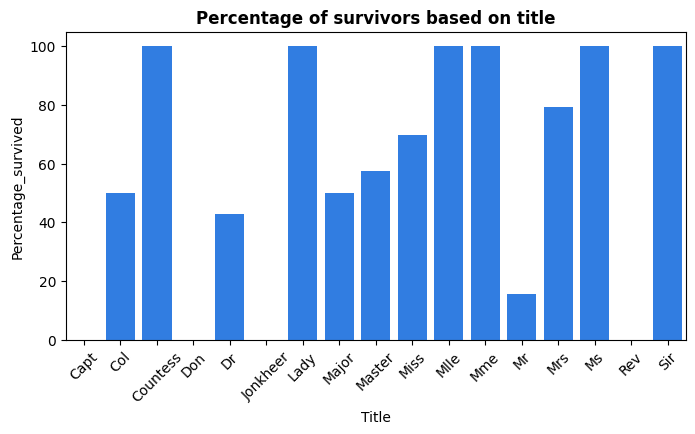

In [10]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')

# Count per title
title_table = pd.DataFrame(df['Title'].value_counts())
title_table = title_table.rename(columns={'count': 'Total_count'})

# Sort index alphabetically
title_table = title_table.sort_index()  

# Count survivors
survival_count = df.groupby('Title')['Survived'].sum()
title_table['Survived'] = survival_count

# Survival rate
title_table['Percentage_survived'] =  ((title_table['Survived'] / title_table['Total_count'])*100).round(2)

display(title_table)

plt.figure(figsize=(8,4))
sns.barplot(data=title_table, x='Title', y='Percentage_survived', color="#1379FF")
_ = plt.xticks(rotation=45)
plt.title('Percentage of survivors based on title', fontweight='bold')
plt.savefig('plots/02_Title_survival', dpi=300, bbox_inches='tight')
plt.show()



In [11]:
df['LastName'] = df['Name'].str.split(',', n=1, expand=True)[0]
df['Name'] = df['Name'].str.split('.', n=1).str[1].str.strip()

C:\Users\MSI\AppData\Local\Temp\ipykernel_27052\3460560475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['Sex'], ax=ax[0], palette=['#008080','#F0A51A'])


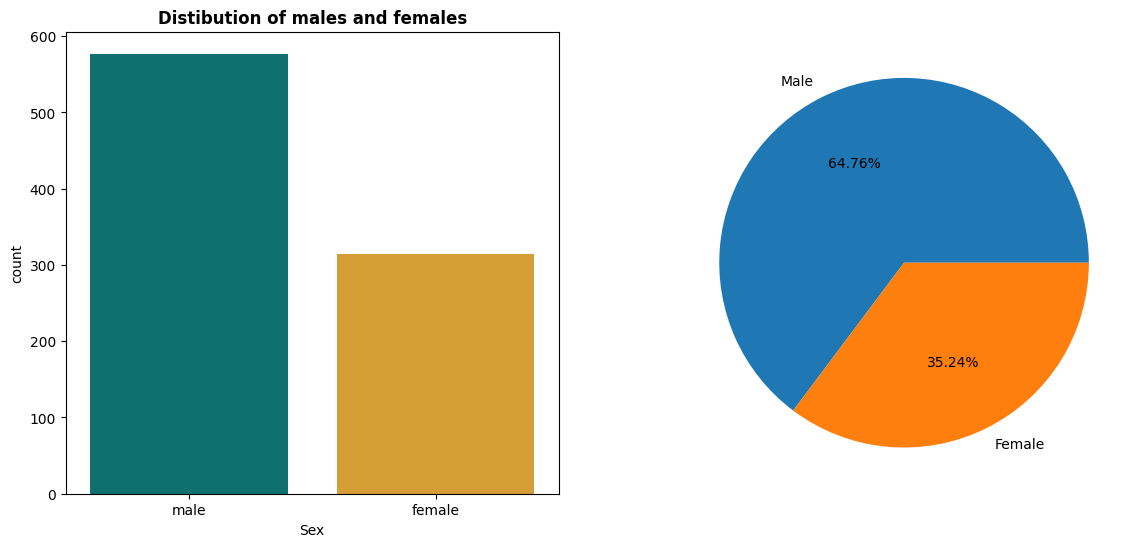

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(data=df, x=df['Sex'], ax=ax[0], palette=['#008080','#F0A51A'])
ax[1].pie(df['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.2f%%',)
ax[0].set_title('Distibution of males and females', fontweight='bold')
plt.show()

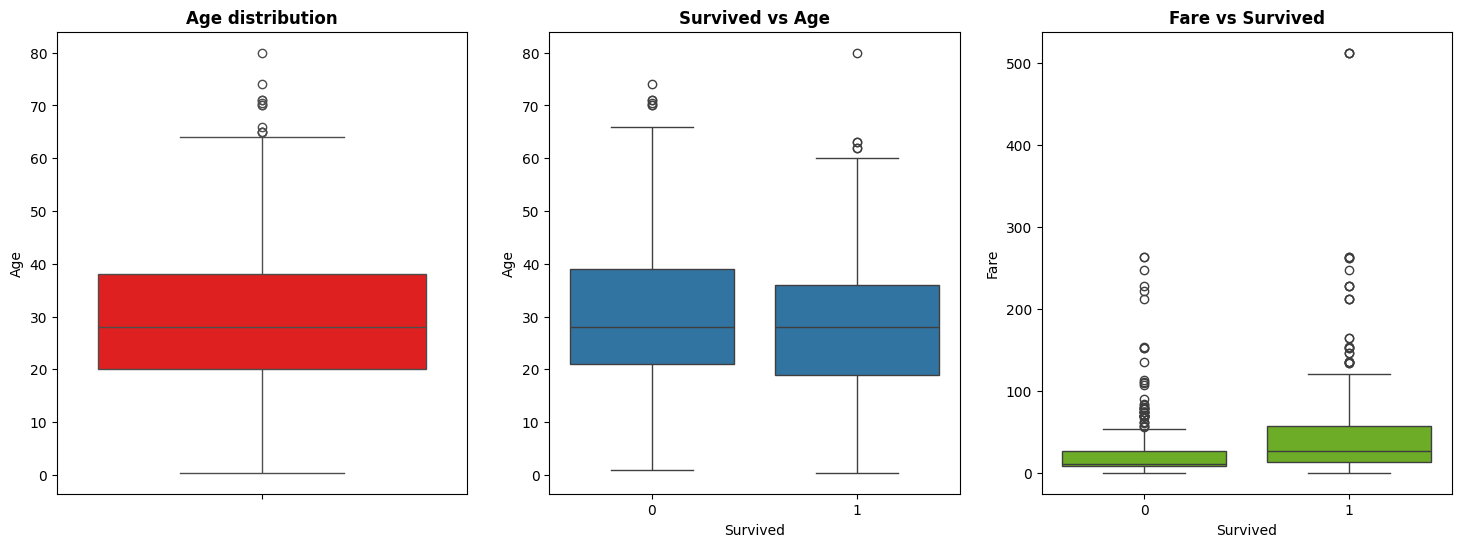

In [13]:
#age_by_sex = pd.DataFrame(df.groupby('Sex')['Age'].mean())         #DATA LEAKAGE (.MEAN())

fig, ax = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(data=df['Age'], ax=ax[0], color='red')
ax[0].set_title('Age distribution', fontweight='bold')
ax[0].set_ylabel('Age')

sns.boxplot(data=df, x='Survived', y='Age', ax=ax[1])
ax[1].set_title('Survived vs Age', fontweight='bold')

sns.boxplot(data=df, x='Survived', y='Fare', color="#6FC210", ax=ax[2])
ax[2].set_title('Fare vs Survived', fontweight='bold')

plt.savefig('plots/03_Age_fare', dpi=300, bbox_inches='tight')
plt.show()

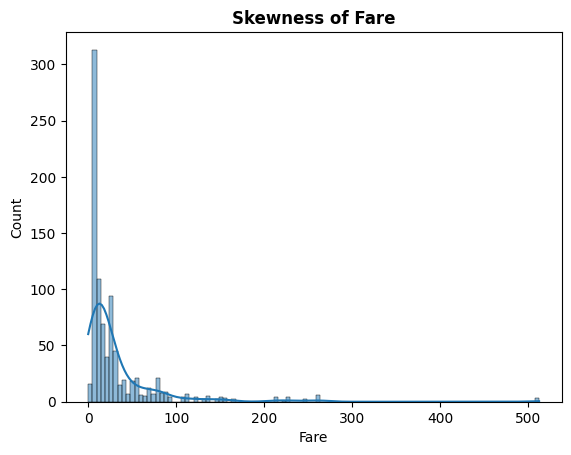

In [14]:
sns.histplot(data=df['Fare'], kde=True)
plt.title('Skewness of Fare', fontweight='bold')
plt.savefig('plots/04_Fare_skewness', dpi=300, bbox_inches='tight')
plt.show()

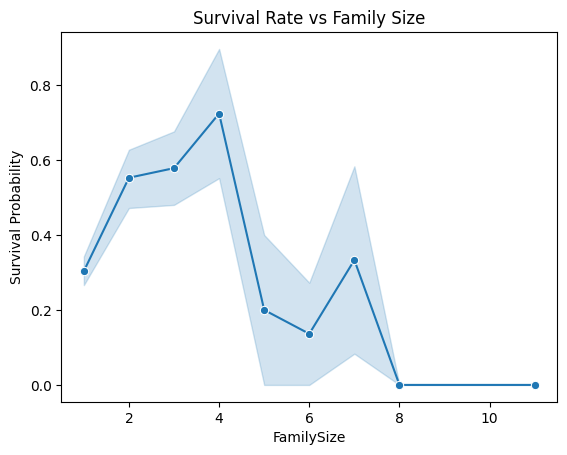

In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.lineplot(data=df, x='FamilySize', y='Survived', estimator='mean', marker='o')
plt.title('Survival Rate vs Family Size')
plt.ylabel('Survival Probability')
plt.show()

In [16]:
df = df.drop(columns=['LastName', 'Name', 'FamilySize'])

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


Data leakage is a situation where information that should not be available in real-world deployment is included in model training.
- The model effectively "learns from the future" or from the test data.
- Result: it appears very accurate during testing, but fails in practice.

Example:
- Scaling or computing the mean using all data before splitting into train and test sets.

In [18]:
X = df.drop(columns='Survived')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [19]:
print(f'Shape of train: {X_train.shape}')
print(f'Shape of test: {X_test.shape}')

Shape of train: (712, 8)
Shape of test: (179, 8)


In [20]:
X_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
566,3,male,24.0,2,0,24.1500,S,Mr
161,3,male,44.0,0,1,16.1000,S,Mr
554,3,male,22.0,0,0,7.2250,C,Mr
861,3,male,41.0,2,0,14.1083,S,Mr
242,3,female,NaN,1,0,15.5000,Q,Miss


In [21]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
693,3,male,NaN,0,0,56.4958,S,Mr
482,2,male,NaN,0,0,0.0000,S,Mr
528,1,male,NaN,0,0,221.7792,S,Mr
856,3,female,18.0,0,1,9.3500,S,Mrs
802,2,female,31.0,1,1,26.2500,S,Mrs


In [22]:
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train[['Age']])
X_test_imp = imputer.transform(X_test[['Age']])

X_train['Age'] = X_train_imp
X_test['Age'] = X_test_imp


cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_catimp = cat_imputer.fit_transform(X_train[['Embarked']])
X_test_catimp = cat_imputer.transform(X_test[['Embarked']])

X_train['Embarked'] = X_train_catimp.ravel()
X_test['Embarked'] = X_test_catimp.ravel()


In [23]:
personal_titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Mme', 'Ms', 'Mlle']
professional_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt']
nobel_titles = ['Sir', 'Lady', 'Don', 'Countess', 'Jonkheer']

def group_title(title):
    if title in personal_titles:
        return 'personal_t'
    elif title in professional_titles:
        return 'professional_t'
    elif title in nobel_titles:
        return 'nobel_t'
    else:
        return 'other_t'
    
X_train['Title_group'] = X_train['Title'].apply(group_title)
X_test['Title_group'] = X_test['Title'].apply(group_title)

X_train


ohe = OneHotEncoder(sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[['Sex','Embarked','Title_group']])
X_test_ohe = ohe.transform(X_test[['Sex','Embarked','Title_group']])

ohe_cols = ohe.get_feature_names_out(['Sex', 'Embarked', 'Title_group'])
print(ohe_cols)

X_train[ohe_cols] = pd.DataFrame(X_train_ohe, index=X_train.index)
X_test[ohe_cols] = pd.DataFrame(X_test_ohe, index=X_test.index)

X_train.drop(columns=['Sex', 'Embarked', 'Title_group', 'Title'], axis=1, inplace=True)
X_test.drop(columns=['Sex', 'Embarked', 'Title_group', 'Title'], axis=1, inplace=True)


'''
title_order = ['Master', 'Miss', 'Mr', 'Mrs', 'Dr', 'Rev', 'Col', 'Major', 'Capt', 
               'Sir', 'Lady', 'Don', 'Mme', 'Ms', 'Mlle', 'Countess', 'Jonkheer']
ordinal_enc = OrdinalEncoder(categories=[title_order], dtype=int)

X_train_oc = ordinal_enc.fit_transform(X_train[['Title']])
X_test_oc = ordinal_enc.transform(X_test[['Title']])

X_train['Title'] = X_train_oc
X_test['Title'] = X_test_oc
'''


['Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'Title_group_nobel_t' 'Title_group_personal_t'
 'Title_group_professional_t']


"\ntitle_order = ['Master', 'Miss', 'Mr', 'Mrs', 'Dr', 'Rev', 'Col', 'Major', 'Capt', \n               'Sir', 'Lady', 'Don', 'Mme', 'Ms', 'Mlle', 'Countess', 'Jonkheer']\nordinal_enc = OrdinalEncoder(categories=[title_order], dtype=int)\n\nX_train_oc = ordinal_enc.fit_transform(X_train[['Title']])\nX_test_oc = ordinal_enc.transform(X_test[['Title']])\n\nX_train['Title'] = X_train_oc\nX_test['Title'] = X_test_oc\n"

In [24]:
X_train['Fare'] = np.log1p(X_train['Fare'])
X_test['Fare'] = np.log1p(X_test['Fare'])

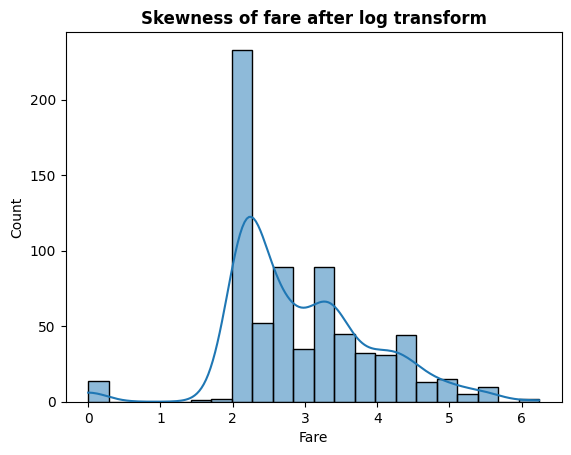

In [25]:
sns.histplot(data=X_train['Fare'], kde=True)
plt.title('Skewness of fare after log transform', fontweight='bold')
plt.savefig('plots/05_Fare_log_transform', dpi=300, bbox_inches='tight')
plt.show()

Transformation (e.g., log or Box-Cox)
- Purpose: to change the shape of a feature’s distribution, especially if it is skewed.

<Axes: xlabel='Fare', ylabel='Count'>

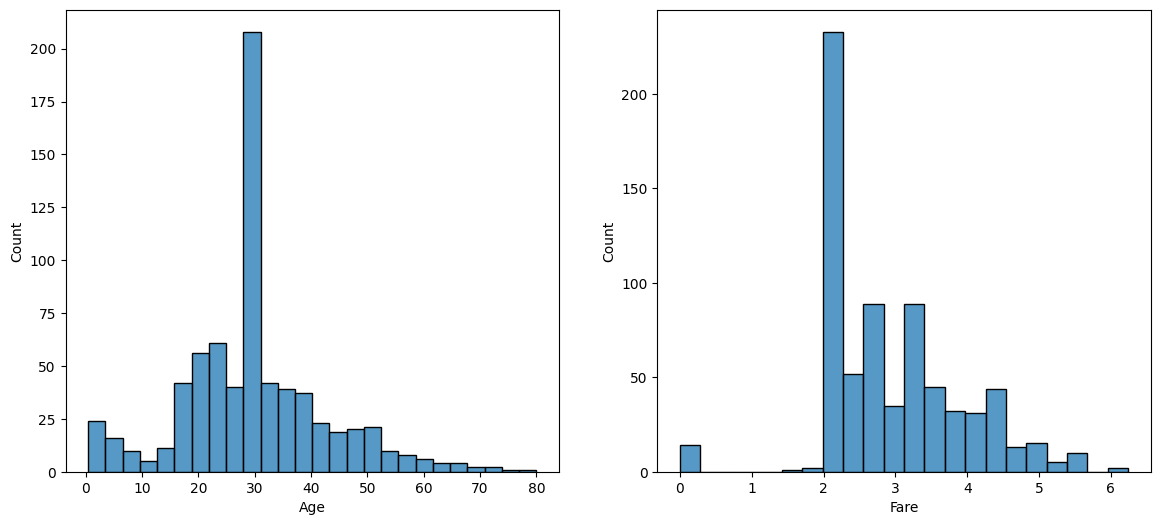

In [26]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.histplot(data=X_train['Age'], ax=ax[0])
sns.histplot(data=X_train['Fare'], ax=ax[1])

Why scale?
- Linear models (Logistic Regression, SVM)
- Weights are sensitive to the scale of inputs.
- Scaling ensures that each feature has approximately the same range, allowing the model to assign fair weights to all features.

In [27]:
scaler = StandardScaler()

scaler_cols = ['Age', 'Fare']

X_train[scaler_cols] = scaler.fit_transform(X_train[scaler_cols])
X_test[scaler_cols] = scaler.transform(X_test[scaler_cols])

<Axes: xlabel='Fare', ylabel='Count'>

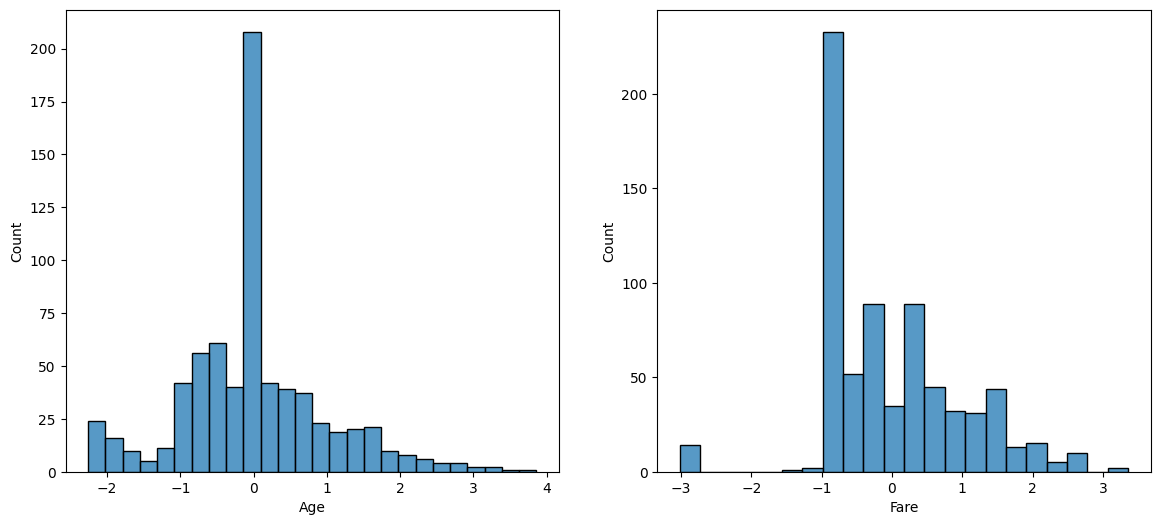

In [28]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.histplot(data=X_train['Age'], ax=ax[0])
sns.histplot(data=X_train['Fare'], ax=ax[1])

In [29]:
#DUMMY TRAP EXPERIMENT
X_train_with_dummy_trap = X_train.copy()
X_test_with_dummy_trap = X_test.copy()

X_train.drop(columns=['Sex_male', 'Embarked_S', 'Title_group_personal_t'], inplace=True)
X_test.drop(columns=['Sex_male', 'Embarked_S', 'Title_group_personal_t'], inplace=True)

In [30]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Title_group_nobel_t,Title_group_professional_t
PassengerId,,,,,,,,,,
693,3,-5.463229e-16,0,0,1.124592,0.0,0.0,0.0,0.0,0.0
482,2,-5.463229e-16,0,0,-3.014278,0.0,0.0,0.0,0.0,0.0
528,1,-5.463229e-16,0,0,2.508198,0.0,0.0,0.0,0.0,0.0
856,3,-9.078708e-01,0,1,-0.627019,1.0,0.0,0.0,0.0,0.0
802,2,9.167471e-02,1,1,0.361872,1.0,0.0,0.0,0.0,0.0


In [31]:
X_train_with_dummy_trap.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_group_nobel_t,Title_group_personal_t,Title_group_professional_t
PassengerId,,,,,,,,,,,,,
693,3,-5.463229e-16,0,0,1.124592,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
482,2,-5.463229e-16,0,0,-3.014278,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
528,1,-5.463229e-16,0,0,2.508198,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
856,3,-9.078708e-01,0,1,-0.627019,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
802,2,9.167471e-02,1,1,0.361872,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 693 to 508
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pclass                      712 non-null    int64  
 1   Age                         712 non-null    float64
 2   SibSp                       712 non-null    int64  
 3   Parch                       712 non-null    int64  
 4   Fare                        712 non-null    float64
 5   Sex_female                  712 non-null    float64
 6   Embarked_C                  712 non-null    float64
 7   Embarked_Q                  712 non-null    float64
 8   Title_group_nobel_t         712 non-null    float64
 9   Title_group_professional_t  712 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 61.2 KB


- Baseline model

In [33]:
logistic_regress = LogisticRegression(max_iter=1000)
logistic_regress.fit(X_train, y_train)
y_pred = logistic_regress.predict(X_test)


In [34]:
coefs = logistic_regress.coef_
pd.DataFrame(coefs, columns=X_train.columns)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Title_group_nobel_t,Title_group_professional_t
0,-0.841849,-0.517056,-0.349947,-0.168816,0.430392,2.530588,0.268717,0.613045,0.117699,0.259425


- Evaluation

In [35]:
accuracy = accuracy_score(y_test, y_pred)
y_proba = logistic_regress.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Baseline model evaluation (1000 iter):')
print('--------------------------')
print(f'Accuracy: {accuracy} = {accuracy*100:.2f}%')
print(f'Roc_auc: {roc_auc} = {roc_auc*100:.2f}%')
print(f'f1-score: {f1} = {f1*100:.2f}%')
print(f'Confussion matrix: \n{cm}\n\n\n\n')



parameters = [0.1, 0.5, 1, 10, 15]

print('Cross validation with different C evaluation:')
print('------------------------------------')
for x in parameters:
    model = LogisticRegression(C=x, max_iter=1000)
    acc_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    auc_score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    f1_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')


    print(f'C = {x}')
    print(f'Accuracy (CV): {np.mean(acc_score)*100:.2f}%')
    print(f'Roc_auc (CV): {np.mean(auc_score)*100:.2f}%')
    print(f'f1-score (CV): {np.mean(f1_cv)*100:.2f}%')
    print('------------------------------------')

Baseline model evaluation (1000 iter):
--------------------------
Accuracy: 0.8100558659217877 = 81.01%
Roc_auc: 0.838866930171278 = 83.89%
f1-score: 0.7384615384615385 = 73.85%
Confussion matrix: 
[[97 13]
 [21 48]]




Cross validation with different C evaluation:
------------------------------------
C = 0.1
Accuracy (CV): 79.64%
Roc_auc (CV): 85.99%
f1-score (CV): 71.53%
------------------------------------
C = 0.5
Accuracy (CV): 78.52%
Roc_auc (CV): 86.15%
f1-score (CV): 71.26%
------------------------------------
C = 1
Accuracy (CV): 78.52%
Roc_auc (CV): 86.07%
f1-score (CV): 71.26%
------------------------------------
C = 10
Accuracy (CV): 78.66%
Roc_auc (CV): 85.76%
f1-score (CV): 71.40%
------------------------------------
C = 15
Accuracy (CV): 78.52%
Roc_auc (CV): 85.75%
f1-score (CV): 71.26%
------------------------------------


- Evaluation with DUMMY TRAP VARIABLE(DTV), (multicorrineality experiment)

In [36]:
logistic_regress_dtv = LogisticRegression(max_iter=1000)
logistic_regress_dtv.fit(X_train_with_dummy_trap, y_train)
y_pred_dtv = logistic_regress_dtv.predict(X_test_with_dummy_trap)

accuracy_dtv = accuracy_score(y_test, y_pred_dtv)
y_proba_dtv = logistic_regress_dtv.predict_proba(X_test_with_dummy_trap)[:, 1]
roc_auc_dtv = roc_auc_score(y_test, y_proba_dtv)
cm_dtv = confusion_matrix(y_test, y_pred_dtv)
f1_dtv = f1_score(y_test, y_pred_dtv)

print('Baseline model evaluation with dummy variable trap:')
print('--------------------------')
print(f'Accuracy: {accuracy_dtv} = {accuracy_dtv*100:.2f}%')
print(f'Roc_auc: {roc_auc_dtv} = {roc_auc_dtv*100:.2f}%')
print(f'f1-score: {f1_dtv} = {f1_dtv*100:.2f}%')
print(f'Confussion matrix: \n{cm_dtv}')


Baseline model evaluation with dummy variable trap:
--------------------------
Accuracy: 0.7988826815642458 = 79.89%
Roc_auc: 0.8371541501976285 = 83.72%
f1-score: 0.7230769230769231 = 72.31%
Confussion matrix: 
[[96 14]
 [22 47]]


Takeaways:
- L2 regularization (the default in logistic regression in sklearn) can handle linearly dependent features.
- The "dummy variable trap" is mostly a theoretical issue, but its practical impact depends on the regularization used.
- L2 regularization is recommended in practice to prevent multicollinearity and overfitting.
- For smaller models or linear regression without regularization, this issue can be more significant.

In [37]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Results")
print("----------------------")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print(f"Confusion matrix:\n{cm_rf}")

Random Forest Results
----------------------
Accuracy: 0.81
ROC-AUC: 0.84
F1-score: 0.71
Confusion matrix:
[[104   6]
 [ 28  41]]


In [38]:
gb = GradientBoostingClassifier(
    n_estimators=100,      # number of boosting rounds
    learning_rate=0.1,     # step size shrinkage
    max_depth=3,           # depth of each tree
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:,1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
f1_gb = f1_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Random Forest Results")
print("----------------------")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"ROC-AUC: {roc_auc_gb:.2f}")
print(f"F1-score: {f1_gb:.2f}")
print(f"Confusion matrix:\n{cm_gb}")

Random Forest Results
----------------------
Accuracy: 0.81
ROC-AUC: 0.81
F1-score: 0.72
Confusion matrix:
[[101   9]
 [ 25  44]]


POZNAMKY:

1. Transformácia

        Účel: zmeniť tvar alebo distribúciu dát (features).
        Použitie: hlavne keď je feature šikmá (skewed) alebo má extrémne hodnoty (outliers).
        Príklady: Logaritmická transformácia (log(x)), Box-Cox transformácia
        Efekt: môže zlepšiť modelovanie tým, že dáta budú viac “normálne” alebo lineárne vzťahy budú silnejšie.

2. Škálovanie (Scaling)

        Účel: upraviť rozsah hodnôt jednotlivých features, aby mali približne rovnaký rozsah.
        Použitie: hlavne u modelov citlivých na veľkosť vstupov, napr.: Lineárna regresia, Logistic regression, SVM, KNN
        Príklady: Min-Max škálovanie: hodnoty od 0 do 1
        Standardizácia: odčítanie priemeru a delenie štandardnou odchýlkou
        Efekt: model priradí “spravodlivú” váhu každému feature, váhy nebudú deformované extrémnymi hodnotami.

3. Regularizácia

        Účel: obmedziť veľkosť váh modelu, aby sa predišlo pretrénovaniu (overfitting) a problémom s kolinearitou.
        Použitie: hlavne u lineárnych alebo logistických modelov, ale aj iných modelov.
        Príklady:
            L2 regularizácia (Ridge) → penalizuje veľkosť váh quadraticky
            L1 regularizácia (Lasso) → penalizuje veľkosť váh lineárne a môže robiť feature selection
        Efekt: model sa stáva stabilnejší, menej citlivý na šum a kolineárne feature.